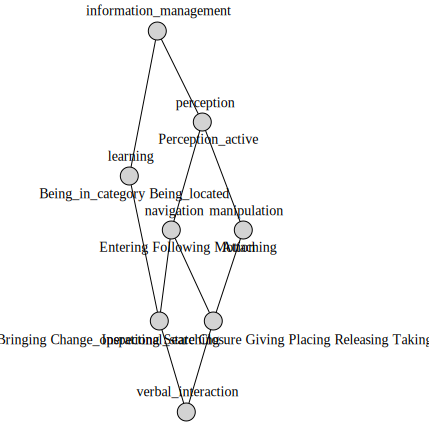

In [36]:
from concepts import Context
context = Context.fromfile('table.csv', frmat='csv')
lattice = context.lattice
lattice.graphviz()

In [2]:
# what is needed for the wanted frame
wanted = context.intension(['Bringing'])
print(wanted)

('perception', 'navigation', 'manipulation', 'information_management')


In [38]:
# the intersection between needed and possible capabilities
true_capabilities = ['perception', 'navigation', 'learning', 'verbal_interaction', 'information_management']
#true_capabilities = ['information_management', 'perception']
can_provide = [cap for cap in wanted if cap in true_capabilities]
print(can_provide)

['perception', 'navigation', 'information_management']


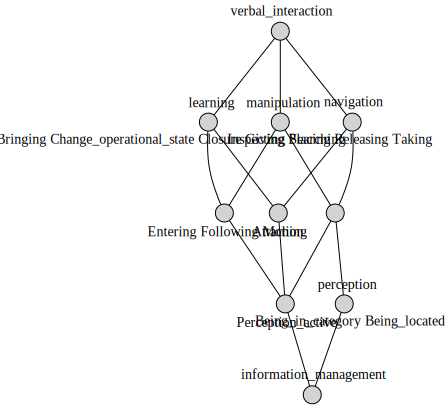

In [39]:
# upside down
context_inv = Context(*context.definition().inverted())
lattice_inv = context_inv.lattice
lattice_inv.graphviz()

In [40]:
# the upper neighbors
#neighbors = context.neighbors(['Bringing'])
#print(neighbors)

In [41]:
#simpler = lattice['Bringing',].upper_neighbors
#for concept in simpler:
#    objects, 

In [42]:
#lattice[can_provide]

In [43]:
anticoncept = lattice_inv['Bringing',]
all_properties = context.properties
#print(anticoncept)
to_consider = anticoncept.lower_neighbors
results = []
while to_consider:
    #print(to_consider)
    print('looping')
    new_to_consider = []
    for candidate_link in to_consider:
        simpler_actions, not_requires = candidate_link
        print(simpler_actions, not_requires)
        requires = [p for p in all_properties if p not in not_requires]
        if all(elem in true_capabilities for elem in requires):
            print('can do', simpler_actions)
            results.extend(simpler_actions)
        new_to_consider.extend(candidate_link.lower_neighbors)
    
    to_consider = [candidate for candidate in new_to_consider if candidate is not lattice_inv.infimum]
    
print(results)

looping
('Entering', 'Following', 'Motion', 'Perception_active') ('manipulation', 'learning', 'verbal_interaction')
can do ('Entering', 'Following', 'Motion', 'Perception_active')
('Attaching', 'Perception_active') ('navigation', 'learning', 'verbal_interaction')
looping
('Perception_active',) ('navigation', 'manipulation', 'learning', 'verbal_interaction')
can do ('Perception_active',)
('Perception_active',) ('navigation', 'manipulation', 'learning', 'verbal_interaction')
can do ('Perception_active',)
['Entering', 'Following', 'Motion', 'Perception_active', 'Perception_active', 'Perception_active']


In [44]:
anticoncept.lower_neighbors[0].lower_neighbors[0].lower_neighbors

(<Infimum {} <-> [perception navigation manipulation learning verbal_interaction information_management] <=> information_management>,)

In [49]:
cannot_provide = [cap for cap in wanted if cap not in true_capabilities]
print(cannot_provide)
boh = lattice_inv[cannot_provide]

['manipulation']


In [50]:

anticoncept.meet(boh)
#lattice_inv[can_provide]

<Concept {Entering, Following, Motion, Perception_active} <-> [manipulation learning verbal_interaction] <=> Entering Following Motion>

In [23]:
c.neighbors(['ptionPerce_active'])

[(('Attaching',
   'Being_in_category',
   'Being_located',
   'Bringing',
   'Change_operational_state',
   'Closure',
   'Entering',
   'Following',
   'Giving',
   'Inspecting',
   'Motion',
   'Perception_active',
   'Placing',
   'Releasing',
   'Searching',
   'Taking'),
  ('information_management',))]